# 第16章: 時系列分析の追加トピック (Additional Topics in Time Series Regression)

この章では、時系列分析の発展的なトピックについて学びます。

## 主なトピック
- 単位根検定
- 共和分
- ボラティリティモデル（ARCH/GARCH）
- 構造変化の検定

## 必要なパッケージ

In [1]:
# 必要なパッケージのインストールと読み込み
if (!require("AER")) install.packages("AER")
if (!require("urca")) install.packages("urca")
if (!require("tseries")) install.packages("tseries")
if (!require("dynlm")) install.packages("dynlm")
if (!require("strucchange")) install.packages("strucchange")
if (!require("fGarch")) install.packages("fGarch")

library(AER)
library(urca)
library(tseries)
library(dynlm)
library(strucchange)
library(fGarch)

Loading required package: AER



Loading required package: car



Loading required package: carData



Loading required package: lmtest



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: sandwich



Loading required package: survival



Loading required package: urca



Loading required package: tseries



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Loading required package: dynlm



Loading required package: strucchange



Loading required package: fGarch



NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



---
## 問題1: 単位根とランダムウォーク

定常AR(1)過程とランダムウォーク（単位根過程）の違いを理解します。

```r
set.seed(123)
n <- 300

# 定常AR(1): phi = 0.9
ar_stationary <- arima.sim(n = n, model = list(ar = 0.9))

# 単位根過程: phi = 1（ランダムウォーク）
random_walk <- cumsum(rnorm(n))

# 単位根 + ドリフト
rw_drift <- cumsum(0.1 + rnorm(n))
```

1. 3つの系列をプロットして比較してください
2. 各系列のACFを確認してください
3. 各系列の特徴を説明してください

In [2]:
# ここに回答を入力してください


### 模範解答

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <cf>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '定常AR(1), φ = 0.9' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: 定常AR(1)' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: 定常AR(1)' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: 定常AR(1)' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: 定常AR(1)' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: 定常AR(1)' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: 定常AR(1)' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <98>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <bd>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク（単位根）' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: ランダムウォーク' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ランダムウォーク + ドリフト' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'ACF: RW + ドリフト' in 'mbcsToSbcs': dot substituted for <88>”


各系列の特徴:



1. 定常AR(1) (φ = 0.9):


   - 平均回帰性がある（平均周りを変動）


   - ACFは指数的に減衰する


   - 分散は一定



2. ランダムウォーク (φ = 1):


   - 平均回帰性がない（どこにでも行ける）


   - ACFは非常にゆっくり減衰


   - 分散は時間とともに増大



3. ランダムウォーク + ドリフト:


   - 確定的なトレンドに沿ってランダムウォーク


   - 上昇または下降トレンドを示す


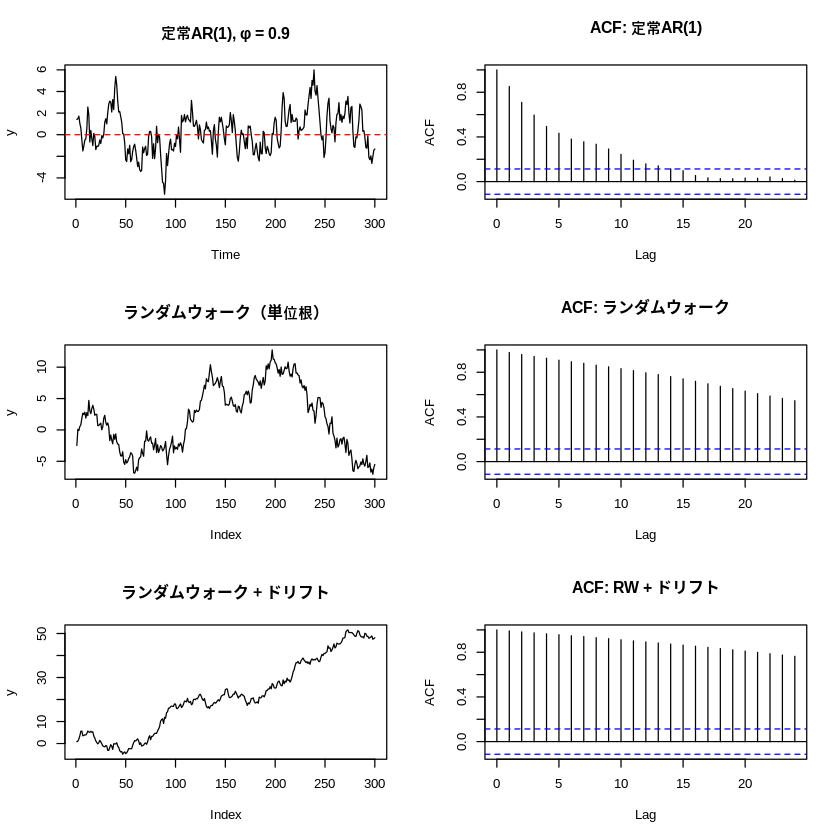

In [3]:
# データの生成
set.seed(123)
n <- 300

ar_stationary <- arima.sim(n = n, model = list(ar = 0.9))
random_walk <- cumsum(rnorm(n))
rw_drift <- cumsum(0.1 + rnorm(n))

# 1. 時系列プロット
par(mfrow = c(3, 2))

plot(ar_stationary, main = "定常AR(1), φ = 0.9", ylab = "y")
abline(h = 0, lty = 2, col = "red")
acf(ar_stationary, main = "ACF: 定常AR(1)")

plot(random_walk, main = "ランダムウォーク（単位根）", ylab = "y", type = "l")
acf(random_walk, main = "ACF: ランダムウォーク")

plot(rw_drift, main = "ランダムウォーク + ドリフト", ylab = "y", type = "l")
acf(rw_drift, main = "ACF: RW + ドリフト")

par(mfrow = c(1, 1))

# 3. 特徴の説明
cat("各系列の特徴:\n\n")
cat("1. 定常AR(1) (φ = 0.9):\n")
cat("   - 平均回帰性がある（平均周りを変動）\n")
cat("   - ACFは指数的に減衰する\n")
cat("   - 分散は一定\n\n")

cat("2. ランダムウォーク (φ = 1):\n")
cat("   - 平均回帰性がない（どこにでも行ける）\n")
cat("   - ACFは非常にゆっくり減衰\n")
cat("   - 分散は時間とともに増大\n\n")

cat("3. ランダムウォーク + ドリフト:\n")
cat("   - 確定的なトレンドに沿ってランダムウォーク\n")
cat("   - 上昇または下降トレンドを示す\n")

---
## 問題2: ADF検定（Augmented Dickey-Fuller Test）

単位根の有無を検定するADF検定を実施します。

```r
set.seed(456)
n <- 200

# 単位根過程
y_nonstationary <- cumsum(rnorm(n))

# 定常過程
y_stationary <- arima.sim(n = n, model = list(ar = 0.7))
```

1. 両方の系列にADF検定を実施してください
2. 検定結果を解釈してください
3. 単位根がある系列に対して、差分を取ってから再検定してください

In [4]:
# ここに回答を入力してください


### 模範解答

In [5]:
# データの生成
set.seed(456)
n <- 200

y_nonstationary <- cumsum(rnorm(n))
y_stationary <- arima.sim(n = n, model = list(ar = 0.7))

# 1. ADF検定の実施
cat("単位根過程のADF検定:\n")
adf_nonstat <- ur.df(y_nonstationary, type = "drift", selectlags = "AIC")
summary(adf_nonstat)

cat("\n定常過程のADF検定:\n")
adf_stat <- ur.df(y_stationary, type = "drift", selectlags = "AIC")
summary(adf_stat)

# 2. 検定結果の解釈
cat("\n検定結果の解釈:\n")
cat("帰無仮説: 単位根がある（非定常）\n")
cat("対立仮説: 単位根がない（定常）\n\n")

cat("単位根過程: 検定統計量が臨界値より大きい → 帰無仮説を棄却できない\n")
cat("定常過程: 検定統計量が臨界値より小さい → 帰無仮説を棄却できる\n\n")

# 3. 差分を取った系列の検定
cat("差分を取った後のADF検定（元の単位根過程）:\n")
y_diff <- diff(y_nonstationary)
adf_diff <- ur.df(y_diff, type = "drift", selectlags = "AIC")
summary(adf_diff)

cat("\n結論: 差分を取ることで定常になりました（I(1)過程）\n")

単位根過程のADF検定:



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49228 -0.68266  0.01537  0.76205  2.26339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.16762    0.11716   1.431   0.1541  
z.lag.1     -0.02786    0.01610  -1.730   0.0853 .
z.diff.lag   0.03040    0.07137   0.426   0.6707  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9881 on 195 degrees of freedom
Multiple R-squared:  0.01545,	Adjusted R-squared:  0.005348 
F-statistic:  1.53 on 2 and 195 DF,  p-value: 0.2192


Value of test-statistic is: -1.7298 1.499 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



定常過程のADF検定:



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44500 -0.71035  0.04169  0.66823  2.48982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.12949    0.07422   1.745   0.0826 .  
z.lag.1     -0.30142    0.05961  -5.057  9.8e-07 ***
z.diff.lag  -0.16619    0.07187  -2.312   0.0218 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.969 on 195 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1943 
F-statistic: 24.75 on 2 and 195 DF,  p-value: 2.645e-10


Value of test-statistic is: -5.0567 12.7969 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



検定結果の解釈:


帰無仮説: 単位根がある（非定常）


対立仮説: 単位根がない（定常）



単位根過程: 検定統計量が臨界値より大きい → 帰無仮説を棄却できない


定常過程: 検定統計量が臨界値より小さい → 帰無仮説を棄却できる



差分を取った後のADF検定（元の単位根過程）:



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.45118 -0.66565 -0.02297  0.82860  2.14569 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0007186  0.0708168   0.010    0.992    
z.lag.1     -0.9118052  0.1001494  -9.104   <2e-16 ***
z.diff.lag  -0.0736979  0.0714728  -1.031    0.304    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9939 on 194 degrees of freedom
Multiple R-squared:  0.4953,	Adjusted R-squared:  0.4901 
F-statistic: 95.21 on 2 and 194 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.1045 41.4511 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



結論: 差分を取ることで定常になりました（I(1)過程）


---
## 問題3: PP検定とKPSS検定

ADF検定以外の単位根検定を実施します。

問題2のデータを使って：

1. Phillips-Perron（PP）検定を実施してください
2. KPSS検定を実施してください
3. 各検定の特徴と結果を比較してください

In [6]:
# ここに回答を入力してください


### 模範解答

In [7]:
# 問題2のデータを再生成
set.seed(456)
n <- 200
y_nonstationary <- cumsum(rnorm(n))
y_stationary <- arima.sim(n = n, model = list(ar = 0.7))

# 1. Phillips-Perron検定
cat("Phillips-Perron検定:\n")
cat("\n単位根過程:\n")
print(pp.test(y_nonstationary))

cat("\n定常過程:\n")
print(pp.test(y_stationary))

# 2. KPSS検定
cat("\nKPSS検定:\n")
cat("（帰無仮説: 定常 / 対立仮説: 非定常）\n")
cat("\n単位根過程:\n")
print(kpss.test(y_nonstationary, null = "Level"))

cat("\n定常過程:\n")
print(kpss.test(y_stationary, null = "Level"))

# 3. 比較
cat("\n検定の比較:\n")
cat("┌────────────────┬─────────────────────┬─────────────────────┐\n")
cat("│ 検定           │ 帰無仮説            │ 対立仮説            │\n")
cat("├────────────────┼─────────────────────┼─────────────────────┤\n")
cat("│ ADF/PP         │ 単位根あり（非定常）│ 単位根なし（定常）  │\n")
cat("│ KPSS           │ 定常                │ 非定常              │\n")
cat("└────────────────┴─────────────────────┴─────────────────────┘\n")

cat("\n推奨: ADF/PPとKPSSの両方を実施し、結果が一致するか確認する\n")
cat("- 両方が同じ結論 → 強い証拠\n")
cat("- 結論が異なる → さらなる分析が必要\n")

Phillips-Perron検定:



単位根過程:



	Phillips-Perron Unit Root Test

data:  y_nonstationary
Dickey-Fuller Z(alpha) = -7.9264, Truncation lag parameter = 4, p-value
= 0.6626
alternative hypothesis: stationary




定常過程:


Warning message in pp.test(y_stationary):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  y_stationary
Dickey-Fuller Z(alpha) = -74.605, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary




KPSS検定:


（帰無仮説: 定常 / 対立仮説: 非定常）



単位根過程:


Warning message in kpss.test(y_nonstationary, null = "Level"):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  y_nonstationary
KPSS Level = 1.1214, Truncation lag parameter = 4, p-value = 0.01




定常過程:


Warning message in kpss.test(y_stationary, null = "Level"):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  y_stationary
KPSS Level = 0.13243, Truncation lag parameter = 4, p-value = 0.1




検定の比較:


┌────────────────┬─────────────────────┬─────────────────────┐


│ 検定           │ 帰無仮説            │ 対立仮説            │


├────────────────┼─────────────────────┼─────────────────────┤


│ ADF/PP         │ 単位根あり（非定常）│ 単位根なし（定常）  │


│ KPSS           │ 定常                │ 非定常              │


└────────────────┴─────────────────────┴─────────────────────┘



推奨: ADF/PPとKPSSの両方を実施し、結果が一致するか確認する


- 両方が同じ結論 → 強い証拠


- 結論が異なる → さらなる分析が必要


---
## 問題4: 共和分の概念

2つの非定常な系列が共和分関係にある場合を理解します。

```r
set.seed(789)
n <- 300

# 共通のトレンド（確率トレンド）
common_trend <- cumsum(rnorm(n))

# 共和分関係にある2つの系列
y1 <- common_trend + rnorm(n, 0, 0.5)
y2 <- 2 + 0.5 * common_trend + rnorm(n, 0, 0.5)

# 共和分関係にない2つの系列
z1 <- cumsum(rnorm(n))
z2 <- cumsum(rnorm(n))  # 独立なランダムウォーク
```

1. 共和分関係にある系列と無い系列をプロットしてください
2. 各ペアの線形結合の定常性を確認してください
3. 共和分の意味を説明してください

In [8]:
# ここに回答を入力してください


### 模範解答

Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '共和分あり: y1とy2' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '共和分なし: z1とz2' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '残差（共和分あり）' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '残差（共和分なし）' in 'mbcsToSbcs': dot substituted for <89>”


残差のADF検定（共和分あり）:


Warning message in adf.test(residuals_y):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  residuals_y
Dickey-Fuller = -6.4075, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary




残差のADF検定（共和分なし）:



	Augmented Dickey-Fuller Test

data:  residuals_z
Dickey-Fuller = -1.2965, Lag order = 6, p-value = 0.8728
alternative hypothesis: stationary




共和分の意味:


- y1とy2は共に非定常（単位根を持つ）


- しかし、ある線形結合 y1 - β*y2 は定常


- これは両変数が「長期的な均衡関係」を持つことを意味する


- 例: 物価と賃金、消費と所得、株価と配当など


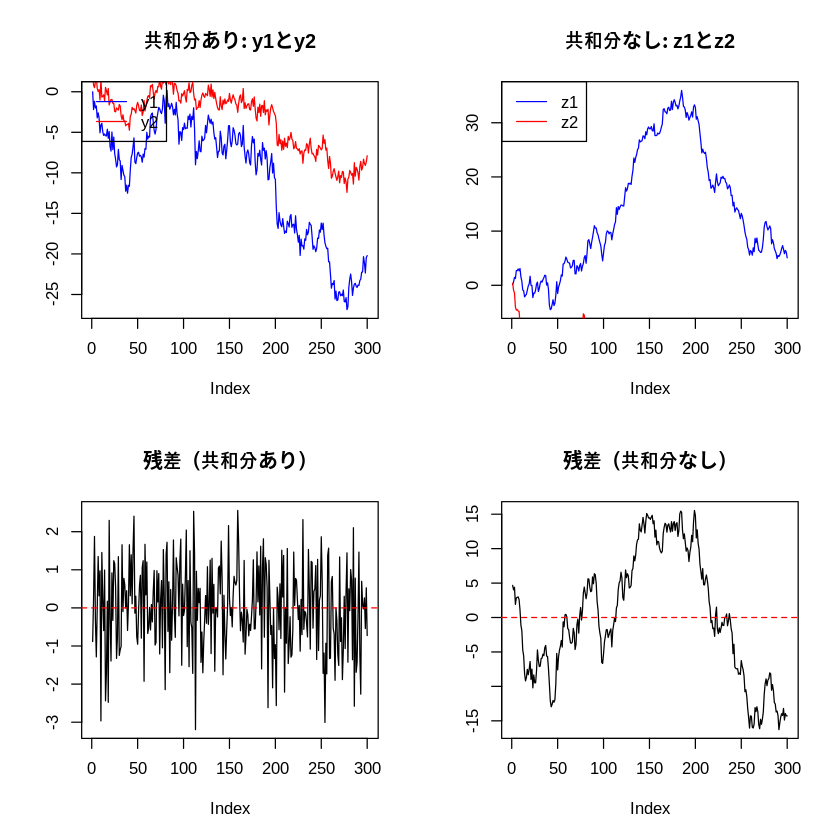

In [9]:
# データの生成
set.seed(789)
n <- 300

common_trend <- cumsum(rnorm(n))

y1 <- common_trend + rnorm(n, 0, 0.5)
y2 <- 2 + 0.5 * common_trend + rnorm(n, 0, 0.5)

z1 <- cumsum(rnorm(n))
z2 <- cumsum(rnorm(n))

# 1. プロット
par(mfrow = c(2, 2))

plot(y1, type = "l", col = "blue", main = "共和分あり: y1とy2", ylab = "")
lines(y2, col = "red")
legend("topleft", legend = c("y1", "y2"), col = c("blue", "red"), lty = 1)

plot(z1, type = "l", col = "blue", main = "共和分なし: z1とz2", ylab = "")
lines(z2, col = "red")
legend("topleft", legend = c("z1", "z2"), col = c("blue", "red"), lty = 1)

# 2. 線形結合の検定
# 共和分あり: y1 - 2*y2 は定常になるはず
# 回帰で共和分ベクトルを推定
coint_reg_y <- lm(y1 ~ y2)
residuals_y <- residuals(coint_reg_y)
plot(residuals_y, type = "l", main = "残差（共和分あり）", ylab = "")
abline(h = 0, lty = 2, col = "red")

coint_reg_z <- lm(z1 ~ z2)
residuals_z <- residuals(coint_reg_z)
plot(residuals_z, type = "l", main = "残差（共和分なし）", ylab = "")
abline(h = 0, lty = 2, col = "red")

par(mfrow = c(1, 1))

# 残差のADF検定
cat("残差のADF検定（共和分あり）:\n")
print(adf.test(residuals_y))

cat("\n残差のADF検定（共和分なし）:\n")
print(adf.test(residuals_z))

# 3. 共和分の意味
cat("\n共和分の意味:\n")
cat("- y1とy2は共に非定常（単位根を持つ）\n")
cat("- しかし、ある線形結合 y1 - β*y2 は定常\n")
cat("- これは両変数が「長期的な均衡関係」を持つことを意味する\n")
cat("- 例: 物価と賃金、消費と所得、株価と配当など\n")

---
## 問題5: Engle-Granger共和分検定

Engle-Granger法を使って共和分を検定します。

問題4のデータを使って：

1. ステップ1: 両系列の単位根を確認してください
2. ステップ2: 共和分回帰を行い、残差を取得してください
3. ステップ3: 残差の単位根検定を行ってください

In [10]:
# ここに回答を入力してください


### 模範解答

In [11]:
# 問題4のデータを再生成
set.seed(789)
n <- 300
common_trend <- cumsum(rnorm(n))
y1 <- common_trend + rnorm(n, 0, 0.5)
y2 <- 2 + 0.5 * common_trend + rnorm(n, 0, 0.5)

# Engle-Granger法
cat("===== Engle-Granger共和分検定 =====\n\n")

# ステップ1: 個別系列の単位根検定
cat("ステップ1: 単位根検定\n")
cat("\ny1のADF検定:\n")
adf_y1 <- ur.df(y1, type = "drift", selectlags = "AIC")
print(summary(adf_y1)@teststat)
print(summary(adf_y1)@cval)

cat("\ny2のADF検定:\n")
adf_y2 <- ur.df(y2, type = "drift", selectlags = "AIC")
print(summary(adf_y2)@teststat)
print(summary(adf_y2)@cval)

cat("→ 両系列とも単位根を持つ（I(1)過程）\n\n")

# ステップ2: 共和分回帰
cat("ステップ2: 共和分回帰\n")
coint_model <- lm(y1 ~ y2)
cat("y1 =", coef(coint_model)[1], "+", coef(coint_model)[2], "* y2 + u\n")
residuals_coint <- residuals(coint_model)

# ステップ3: 残差の単位根検定
cat("\nステップ3: 残差の単位根検定\n")
adf_resid <- ur.df(residuals_coint, type = "none", selectlags = "AIC")
print(summary(adf_resid))

# 注: 共和分回帰の残差の臨界値は通常のADFとは異なる
cat("\n注意: 共和分検定の臨界値（2変数の場合、5%水準）は約-3.37\n")
cat("検定統計量:", summary(adf_resid)@teststat[1], "\n")

if (summary(adf_resid)@teststat[1] < -3.37) {
  cat("結論: 共和分関係がある（帰無仮説を棄却）\n")
} else {
  cat("結論: 共和分関係があるとは言えない\n")
}

===== Engle-Granger共和分検定 =====



ステップ1: 単位根検定



y1のADF検定:


               tau2     phi1
statistic -1.151843 1.201918


      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79



y2のADF検定:


               tau2     phi1
statistic -1.368653 1.369306


      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


→ 両系列とも単位根を持つ（I(1)過程）



ステップ2: 共和分回帰


y1 = -4.038471 + 1.95643 * y2 + u



ステップ3: 残差の単位根検定



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1213 -0.7533  0.0228  0.8727  2.6321 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.10160    0.08674 -12.700   <2e-16 ***
z.diff.lag -0.01088    0.05811  -0.187    0.852    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.129 on 296 degrees of freedom
Multiple R-squared:  0.5566,	Adjusted R-squared:  0.5536 
F-statistic: 185.8 on 2 and 296 DF,  p-value: < 2.2e-16


Value of test-statistic is: -12.6996 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62




注意: 共和分検定の臨界値（2変数の場合、5%水準）は約-3.37


検定統計量: -12.69959 


結論: 共和分関係がある（帰無仮説を棄却）


---
## 問題6: 誤差修正モデル（ECM）

共和分関係がある場合、誤差修正モデルを推定します。

問題4のデータを使って：

1. 誤差修正項を作成してください
2. ECMを推定してください
3. 調整速度パラメータを解釈してください

In [12]:
# ここに回答を入力してください


### 模範解答

In [13]:
# 問題4のデータを再生成
set.seed(789)
n <- 300
common_trend <- cumsum(rnorm(n))
y1 <- common_trend + rnorm(n, 0, 0.5)
y2 <- 2 + 0.5 * common_trend + rnorm(n, 0, 0.5)

# 1. 誤差修正項の作成
coint_model <- lm(y1 ~ y2)
ecm_term <- residuals(coint_model)  # 長期均衡からの乖離

# データをts形式に変換
data_ts <- ts(cbind(y1 = y1, y2 = y2, ecm = c(NA, ecm_term[-n])))

# 2. ECMの推定
# Δy1_t = α + β*Δy2_t + γ*ecm_{t-1} + ε_t
ecm_model <- dynlm(d(y1) ~ d(y2) + L(ecm, 1), data = data_ts)
cat("誤差修正モデルの推定結果:\n")
summary(ecm_model)

# 3. 調整速度パラメータの解釈
gamma <- coef(ecm_model)["L(ecm, 1)"]

cat("\n調整速度パラメータ（γ）:", gamma, "\n\n")

cat("解釈:\n")
cat("- γは長期均衡からの乖離がどれだけ早く修正されるかを示す\n")
cat("- γ < 0 は安定的な調整を意味する（均衡に戻ろうとする）\n")
cat("- |γ|が大きいほど調整が速い\n\n")

cat("この場合:\n")
cat("- 前期の乖離の約", abs(round(gamma * 100)), "%が今期に修正される\n")
cat("- 乖離が1単位増加すると、y1は次期に", round(gamma, 3), "変化する\n")

# 半減期の計算
half_life <- log(0.5) / log(1 + gamma)
cat("- 乖離の半減期: 約", round(half_life, 1), "期\n")

誤差修正モデルの推定結果:



Time series regression with "ts" data:
Start = 3, End = 300

Call:
dynlm(formula = d(y1) ~ d(y2) + L(ecm, 1), data = data_ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5550 -0.7282 -0.0698  0.8071  3.1303 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04574    0.06472  -0.707    0.480    
d(y2)        0.50548    0.07429   6.804 5.66e-11 ***
L(ecm, 1)    0.07437    0.05721   1.300    0.195    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.117 on 295 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1378,	Adjusted R-squared:  0.132 
F-statistic: 23.57 on 2 and 295 DF,  p-value: 3.179e-10



調整速度パラメータ（γ）: 0.07436503 



解釈:


- γは長期均衡からの乖離がどれだけ早く修正されるかを示す


- γ < 0 は安定的な調整を意味する（均衡に戻ろうとする）


- |γ|が大きいほど調整が速い



この場合:


- 前期の乖離の約 7 %が今期に修正される


- 乖離が1単位増加すると、y1は次期に 0.074 変化する


- 乖離の半減期: 約 -9.7 期


---
## 問題7: ボラティリティ・クラスタリング

金融時系列によく見られるボラティリティ・クラスタリングを理解します。

```r
set.seed(111)
n <- 500

# GARCH(1,1)過程のシミュレーション
omega <- 0.01
alpha <- 0.1
beta <- 0.85

returns <- numeric(n)
sigma2 <- numeric(n)
sigma2[1] <- omega / (1 - alpha - beta)  # 無条件分散
returns[1] <- sqrt(sigma2[1]) * rnorm(1)

for (t in 2:n) {
  sigma2[t] <- omega + alpha * returns[t-1]^2 + beta * sigma2[t-1]
  returns[t] <- sqrt(sigma2[t]) * rnorm(1)
}
```

1. リターンと条件付き分散をプロットしてください
2. リターンの二乗のACFを確認してください
3. ボラティリティ・クラスタリングの特徴を説明してください

In [14]:
# ここに回答を入力してください


### 模範解答

Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on 'リターン系列' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <9d>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <b6>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <98>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '条件付き標準偏差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'σ' in 'mbcsToSbcs': dot substituted for <cf>”


Warning message in title(...):
“conversion failure on 'σ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターンのACF' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main %||% if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'リターン二乗のACF' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターンの分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'リターン' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'Q-Qプロット' in 'mbcsToSbcs': dot substituted for <88>”


ボラティリティ・クラスタリングの特徴:



1. リターン自体にはほとんど自己相関がない（効率的市場）


2. リターンの二乗（ボラティリティの代理変数）には強い自己相関


3. 大きな変動の後には大きな変動が続きやすい


4. 分布は正規分布より裾が厚い（ファットテール）



基本統計量:


平均: -0.001468517 


標準偏差: 0.4514675 


歪度: -0.1531898 


尖度: 3.897078 （正規分布は3）


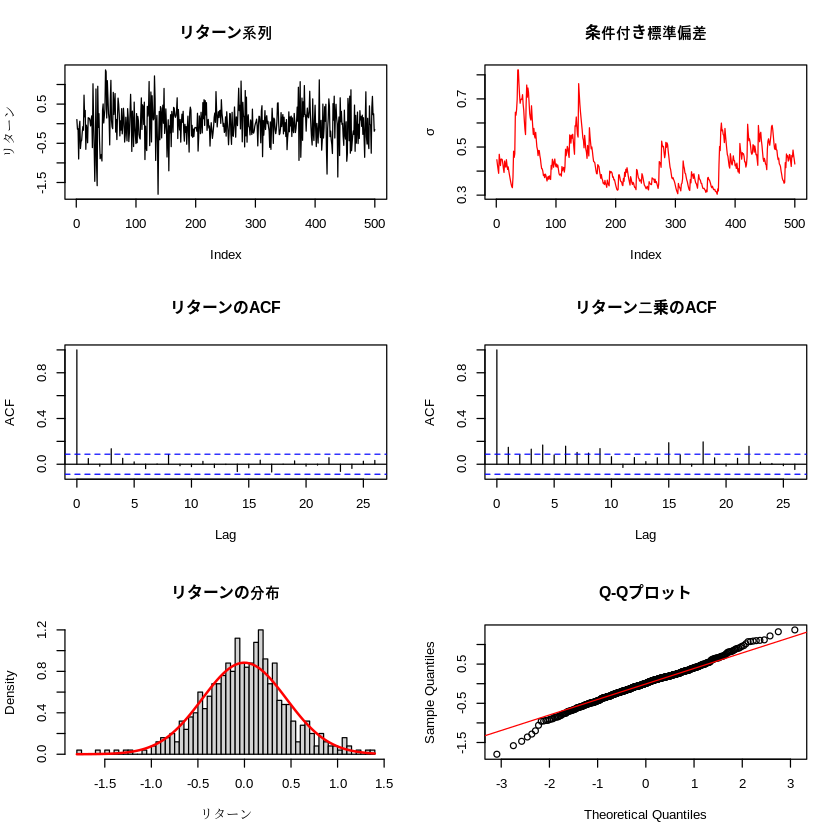

In [15]:
# データの生成
set.seed(111)
n <- 500

omega <- 0.01
alpha <- 0.1
beta <- 0.85

returns <- numeric(n)
sigma2 <- numeric(n)
sigma2[1] <- omega / (1 - alpha - beta)
returns[1] <- sqrt(sigma2[1]) * rnorm(1)

for (t in 2:n) {
  sigma2[t] <- omega + alpha * returns[t-1]^2 + beta * sigma2[t-1]
  returns[t] <- sqrt(sigma2[t]) * rnorm(1)
}

# 1. プロット
par(mfrow = c(3, 2))

plot(returns, type = "l", main = "リターン系列", ylab = "リターン")
plot(sqrt(sigma2), type = "l", main = "条件付き標準偏差", ylab = "σ", col = "red")

# 2. ACF
acf(returns, main = "リターンのACF")
acf(returns^2, main = "リターン二乗のACF")

# ヒストグラム
hist(returns, breaks = 50, main = "リターンの分布", xlab = "リターン", freq = FALSE)
curve(dnorm(x, mean(returns), sd(returns)), add = TRUE, col = "red", lwd = 2)

# QQプロット
qqnorm(returns, main = "Q-Qプロット")
qqline(returns, col = "red")

par(mfrow = c(1, 1))

# 3. 特徴の説明
cat("ボラティリティ・クラスタリングの特徴:\n\n")
cat("1. リターン自体にはほとんど自己相関がない（効率的市場）\n")
cat("2. リターンの二乗（ボラティリティの代理変数）には強い自己相関\n")
cat("3. 大きな変動の後には大きな変動が続きやすい\n")
cat("4. 分布は正規分布より裾が厚い（ファットテール）\n")

# 統計量
cat("\n基本統計量:\n")
cat("平均:", mean(returns), "\n")
cat("標準偏差:", sd(returns), "\n")
cat("歪度:", moments::skewness(returns), "\n")
cat("尖度:", moments::kurtosis(returns), "（正規分布は3）\n")

---
## 問題8: GARCH(1,1)モデルの推定

問題7のデータを使ってGARCH(1,1)モデルを推定します。

1. GARCH(1,1)モデルを推定してください
2. 推定されたパラメータと真の値を比較してください
3. 条件付き分散の予測を行ってください

In [16]:
# ここに回答を入力してください


### 模範解答

GARCH(1,1)モデルの推定結果:



Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = returns, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x558827f53658>
 [data = returns]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
-0.0107732   0.0093761   0.0910930   0.8628500  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     -0.010773    0.018601   -0.579 0.562480    
omega   0.009376    0.004618    2.030 0.042310 *  
alpha1  0.091093    0.027281    3.339 0.000841 ***
beta1   0.862850    0.040466   21.323  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -290.2426    normalized:  -0.5804853 

Description:
 Sat Dec 13 05:38:47 2025 by user:  



Standardised Residuals Tests:
                                 Statistic   p-Value
 Jarque-Bera Test   R    Chi^2   4.5987535 0.1003213
 Shapiro-Wilk Test  R    W       0.99


パラメータの比較:


         真の値    推定値


ω       0.0100     0.0094


α       0.1000     0.0911


β       0.8500     0.8629


α+β     0.9500     0.9539



条件付き標準偏差の予測（20期先まで）:


   meanForecast meanError standardDeviation
1   -0.01077323 0.4163821         0.4163821
2   -0.01077323 0.4180491         0.4180491
3   -0.01077323 0.4196332         0.4196332
4   -0.01077323 0.4211388         0.4211388
5   -0.01077323 0.4225701         0.4225701
6   -0.01077323 0.4239309         0.4239309
7   -0.01077323 0.4252250         0.4252250
8   -0.01077323 0.4264559         0.4264559
9   -0.01077323 0.4276267         0.4276267
10  -0.01077323 0.4287407         0.4287407
11  -0.01077323 0.4298006         0.4298006
12  -0.01077323 0.4308093         0.4308093
13  -0.01077323 0.4317694         0.4317694
14  -0.01077323 0.4326832         0.4326832
15  -0.01077323 0.4335532         0.4335532
16  -0.01077323 0.4343814         0.4343814
17  -0.01077323 0.4351701         0.4351701
18  -0.01077323 0.4359211         0.4359211
19  -0.01077323 0.4366363         0.4366363
20  -0.01077323 0.4373175         0.4373175


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <9d>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <b6>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <98>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '条件付きボラティリティ' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on 'σ' in 'mbcsToSbcs': dot substituted for <cf>”


Warning message in title(...):
“conversion failure on 'σ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '真の値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '推定値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on 'ボラティリティ予測' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on '期間' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '期間' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on '期間' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(...):
“conversion failure on '期間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '期間' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '期間' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in title(...):
“conversion failure on 'σ' in 'mbcsToSbcs': dot substituted for <cf>”


Warning message in title(...):
“conversion failure on 'σ' in 'mbcsToSbcs': dot substituted for <83>”


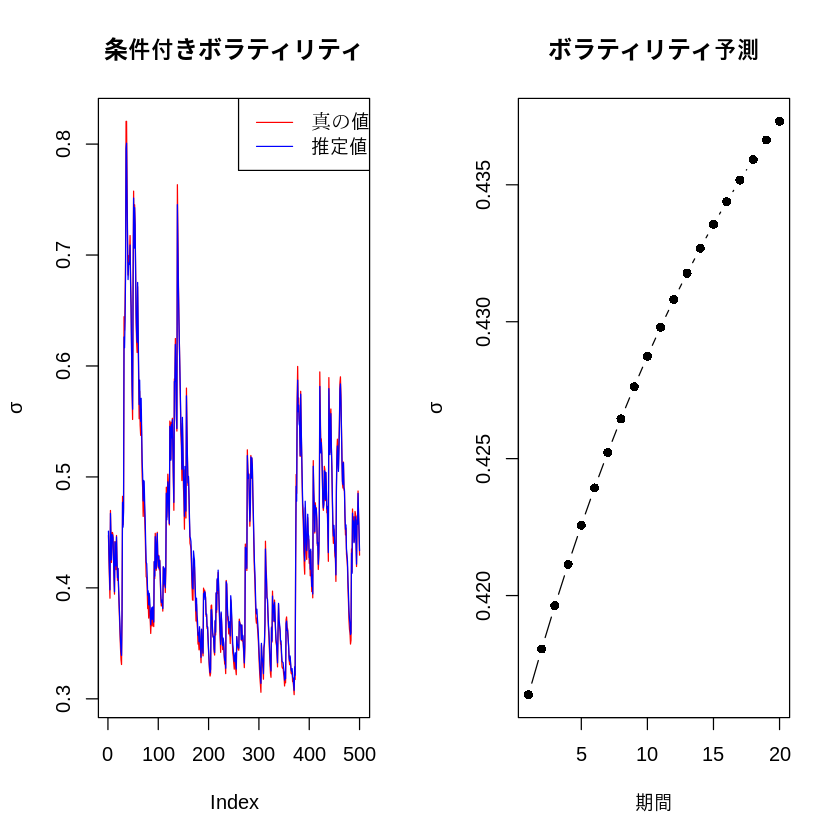

In [17]:
# 問題7のデータを再生成
set.seed(111)
n <- 500
omega <- 0.01
alpha <- 0.1
beta <- 0.85

returns <- numeric(n)
sigma2 <- numeric(n)
sigma2[1] <- omega / (1 - alpha - beta)
returns[1] <- sqrt(sigma2[1]) * rnorm(1)

for (t in 2:n) {
  sigma2[t] <- omega + alpha * returns[t-1]^2 + beta * sigma2[t-1]
  returns[t] <- sqrt(sigma2[t]) * rnorm(1)
}

# 1. GARCH(1,1)モデルの推定
garch_model <- garchFit(~ garch(1, 1), data = returns, trace = FALSE)
cat("GARCH(1,1)モデルの推定結果:\n")
summary(garch_model)

# 2. パラメータの比較
estimated_params <- coef(garch_model)
cat("\nパラメータの比較:\n")
cat("         真の値    推定値\n")
cat(sprintf("ω       %.4f     %.4f\n", omega, estimated_params["omega"]))
cat(sprintf("α       %.4f     %.4f\n", alpha, estimated_params["alpha1"]))
cat(sprintf("β       %.4f     %.4f\n", beta, estimated_params["beta1"]))

# 持続性パラメータ
persistence_true <- alpha + beta
persistence_est <- estimated_params["alpha1"] + estimated_params["beta1"]
cat(sprintf("α+β     %.4f     %.4f\n", persistence_true, persistence_est))

# 3. 条件付き分散の予測
forecast_garch <- predict(garch_model, n.ahead = 20)
cat("\n条件付き標準偏差の予測（20期先まで）:\n")
print(forecast_garch)

# グラフ
fitted_sigma <- garch_model@sigma.t

par(mfrow = c(1, 2))
plot(sqrt(sigma2), type = "l", main = "条件付きボラティリティ", 
     ylab = "σ", col = "red")
lines(fitted_sigma, col = "blue")
legend("topright", legend = c("真の値", "推定値"), col = c("red", "blue"), lty = 1)

plot(1:20, forecast_garch$standardDeviation, type = "b", pch = 16,
     main = "ボラティリティ予測", xlab = "期間", ylab = "σ")
par(mfrow = c(1, 1))

---
## 問題9: 構造変化の検定

時系列データに構造変化（structural break）があるかどうかを検定します。

```r
set.seed(222)
n <- 200
break_point <- 100

# 構造変化のあるデータ
x <- 1:n
y <- ifelse(x <= break_point, 
            2 + 0.05 * x + rnorm(n, 0, 1),
            -5 + 0.15 * x + rnorm(n, 0, 1))
```

1. データをプロットし、構造変化を視覚的に確認してください
2. Chow検定を実施してください
3. 構造変化点を検出してください

In [18]:
# ここに回答を入力してください


### 模範解答

Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <a7>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '構造変化のあるデータ' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '変化点' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in text.default(x, y, ...):
“conversion failure on '前半の回帰線' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in text.default(x, y, ...):
“conversion failure on '後半の回帰線' in 'mbcsToSbcs': dot substituted for <9a>”


Chow検定:



F統計量: 290.0033 


p値: 0 


結論: 構造変化がある（5%水準で有意）



構造変化点の検出（strucchange）:


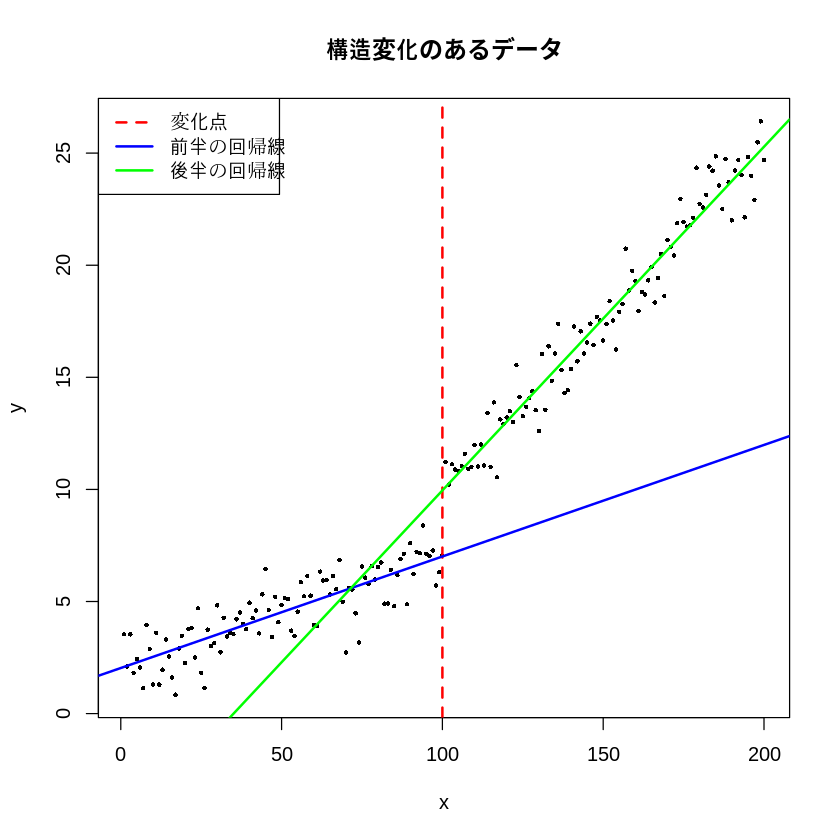

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'OLS-CUSUM検定' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'OLS-CUSUM検定' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'OLS-CUSUM検定' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'OLS-CUSUM検定' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'OLS-CUSUM検定' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'OLS-CUSUM検定' in 'mbcsToSbcs': dot substituted for <9a>”



推定された変化点: 100 


真の変化点: 100 


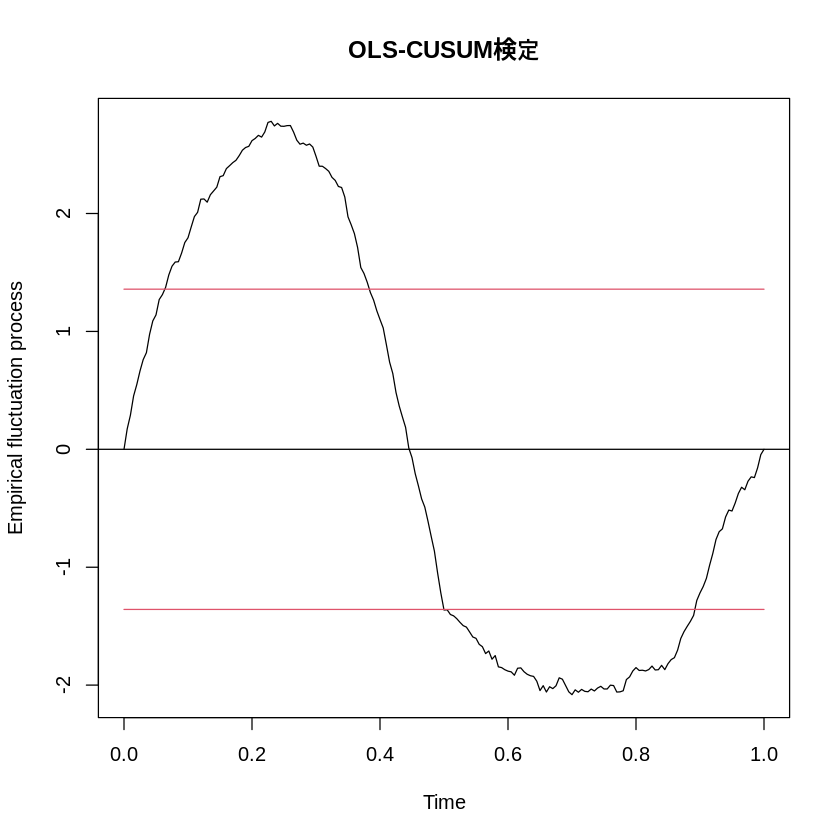

Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <a7>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(...):
“conversion failure on '構造変化の検出' in 'mbcsToSbcs': dot substituted for <ba>”


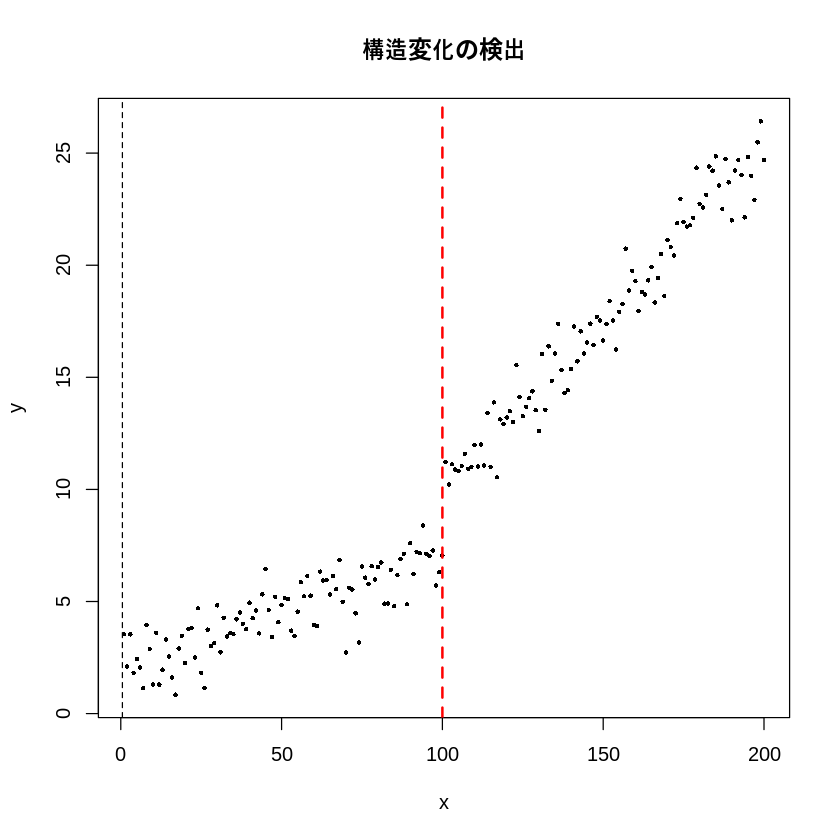

In [19]:
# データの生成
set.seed(222)
n <- 200
break_point <- 100

x <- 1:n
y <- ifelse(x <= break_point, 
            2 + 0.05 * x + rnorm(n, 0, 1),
            -5 + 0.15 * x + rnorm(n, 0, 1))

data_break <- data.frame(y = y, x = x)

# 1. プロット
plot(x, y, main = "構造変化のあるデータ", pch = 16, cex = 0.5)
abline(v = break_point, lty = 2, col = "red", lwd = 2)
abline(lm(y ~ x, data = data_break[1:break_point, ]), col = "blue", lwd = 2)
abline(lm(y ~ x, data = data_break[(break_point+1):n, ]), col = "green", lwd = 2)
legend("topleft", legend = c("変化点", "前半の回帰線", "後半の回帰線"), 
       col = c("red", "blue", "green"), lty = c(2, 1, 1), lwd = 2)

# 2. Chow検定
cat("Chow検定:\n\n")

# 全体のモデル
model_full <- lm(y ~ x, data = data_break)
RSS_full <- sum(residuals(model_full)^2)

# 分割したモデル
model_1 <- lm(y ~ x, data = data_break[1:break_point, ])
model_2 <- lm(y ~ x, data = data_break[(break_point+1):n, ])
RSS_1 <- sum(residuals(model_1)^2)
RSS_2 <- sum(residuals(model_2)^2)
RSS_split <- RSS_1 + RSS_2

# F統計量
k <- 2  # パラメータ数
F_stat <- ((RSS_full - RSS_split) / k) / (RSS_split / (n - 2*k))
p_value <- 1 - pf(F_stat, k, n - 2*k)

cat("F統計量:", F_stat, "\n")
cat("p値:", p_value, "\n")

if (p_value < 0.05) {
  cat("結論: 構造変化がある（5%水準で有意）\n")
} else {
  cat("結論: 構造変化があるとは言えない\n")
}

# 3. 構造変化点の検出
cat("\n構造変化点の検出（strucchange）:\n")

# CUSUM検定
cusum_test <- efp(y ~ x, data = data_break, type = "OLS-CUSUM")
plot(cusum_test, main = "OLS-CUSUM検定")

# Bai-Perronによる変化点検出
bp_test <- breakpoints(y ~ x, data = data_break)
cat("\n推定された変化点:", bp_test$breakpoints, "\n")
cat("真の変化点:", break_point, "\n")

# プロット
plot(data_break$x, data_break$y, pch = 16, cex = 0.5,
     main = "構造変化の検出", xlab = "x", ylab = "y")
lines(bp_test)
abline(v = bp_test$breakpoints, col = "red", lty = 2, lwd = 2)

---
## 問題10: 実データでの応用

実際の経済データを使って、この章で学んだ手法を応用します。

USMacroGデータの消費と所得のデータを使って：

1. 両系列の単位根検定を行ってください
2. 共和分検定を行ってください
3. 共和分関係がある場合、誤差修正モデルを推定してください

In [20]:
# ここに回答を入力してください


### 模範解答

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <b6>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数消費' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on '対数所得' in 'mbcsToSbcs': dot substituted for <97>”


===== 単位根検定 =====



消費のADF検定:


               tau3    phi2     phi3
statistic -1.738467 32.5499 1.611348


      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.07
phi3  8.43  6.49  5.47



所得のADF検定:


               tau3    phi2    phi3
statistic -1.109931 30.2519 1.85715


      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.07
phi3  8.43  6.49  5.47



差分消費のADF検定:


              tau2     phi1
statistic -8.13446 33.16393



結論: 両系列はI(1)過程



===== 共和分検定 =====



共和分回帰: log(C) = -0.1352558 + 1.003063 * log(Y)



残差のADF検定:


              tau1
statistic -1.26748



Johansen共和分検定:


ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [2] not equal to array extent


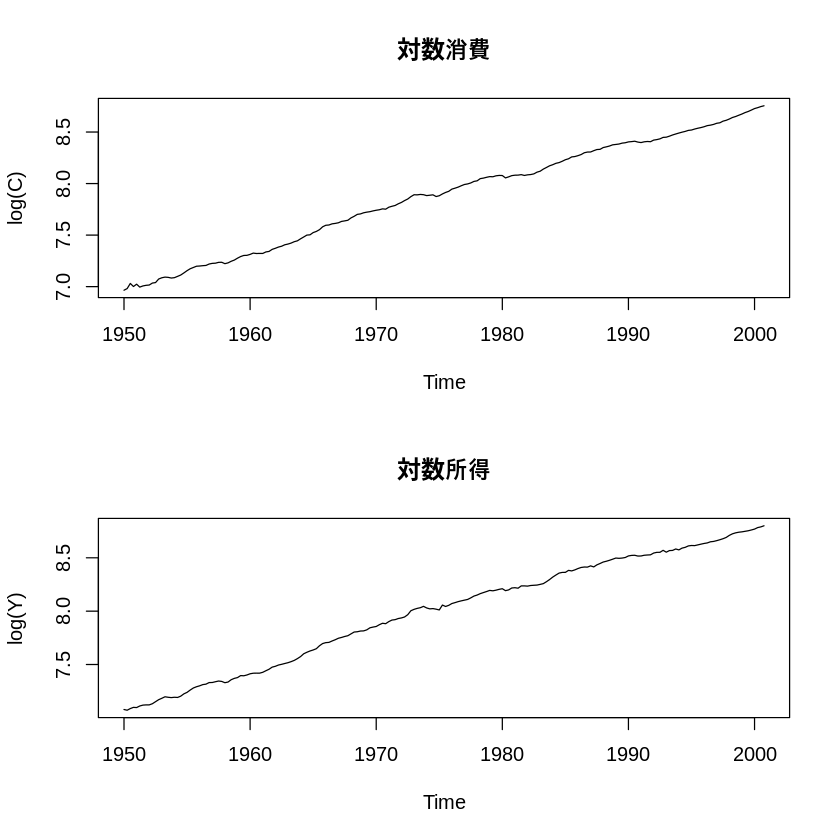

In [21]:
# データの読み込み
data("USMacroG")

# 消費と所得の対数を取得
consumption <- log(USMacroG[, "consumption"])
income <- log(USMacroG[, "dpi"])  # 可処分所得

# データの確認
par(mfrow = c(2, 1))
plot(consumption, main = "対数消費", ylab = "log(C)")
plot(income, main = "対数所得", ylab = "log(Y)")
par(mfrow = c(1, 1))

# 1. 単位根検定
cat("===== 単位根検定 =====\n\n")

cat("消費のADF検定:\n")
adf_c <- ur.df(as.numeric(consumption), type = "trend", selectlags = "AIC")
print(summary(adf_c)@teststat)
print(summary(adf_c)@cval)

cat("\n所得のADF検定:\n")
adf_y <- ur.df(as.numeric(income), type = "trend", selectlags = "AIC")
print(summary(adf_y)@teststat)
print(summary(adf_y)@cval)

# 差分系列の検定
cat("\n差分消費のADF検定:\n")
adf_dc <- ur.df(diff(as.numeric(consumption)), type = "drift", selectlags = "AIC")
print(summary(adf_dc)@teststat)

cat("\n結論: 両系列はI(1)過程\n")

# 2. 共和分検定
cat("\n===== 共和分検定 =====\n\n")

# Engle-Granger法
coint_reg <- lm(as.numeric(consumption) ~ as.numeric(income))
cat("共和分回帰: log(C) =", coef(coint_reg)[1], "+", 
    coef(coint_reg)[2], "* log(Y)\n\n")

residuals_coint <- residuals(coint_reg)

cat("残差のADF検定:\n")
adf_resid <- ur.df(residuals_coint, type = "none", selectlags = "AIC")
print(summary(adf_resid)@teststat)

# Johansen検定
cat("\nJohansen共和分検定:\n")
johansen <- ca.jo(cbind(as.numeric(consumption), as.numeric(income)), 
                  type = "trace", K = 2, spec = "transitory")
summary(johansen)

# 3. 誤差修正モデル
cat("\n===== 誤差修正モデル =====\n\n")

# データの準備
n_obs <- length(consumption)
dc <- diff(as.numeric(consumption))
dy <- diff(as.numeric(income))
ecm_lag <- residuals_coint[-n_obs]

ecm_data <- data.frame(
  dc = dc,
  dy = dy,
  ecm_lag = ecm_lag
)

ecm_model <- lm(dc ~ dy + ecm_lag, data = ecm_data)
cat("誤差修正モデルの推定結果:\n")
summary(ecm_model)

cat("\n解釈:\n")
cat("- 調整速度:", coef(ecm_model)["ecm_lag"], "\n")
cat("- 乖離の約", abs(round(coef(ecm_model)["ecm_lag"] * 100)), 
    "%が四半期ごとに修正される\n")
cat("- 消費と所得には長期均衡関係があり、\n")
cat("  短期的な乖離は徐々に解消される\n")

---
## まとめ

この章では以下の内容を学びました：

1. **単位根過程**: ランダムウォークと非定常性
2. **単位根検定**: ADF検定、PP検定、KPSS検定
3. **共和分**: 非定常な系列間の長期均衡関係
4. **Engle-Granger法**: 共和分検定の2段階手順
5. **誤差修正モデル（ECM）**: 短期ダイナミクスと長期均衡の統合
6. **ボラティリティ・クラスタリング**: 金融時系列の特徴
7. **GARCH モデル**: 条件付き分散のモデル化
8. **構造変化**: Chow検定とBai-Perron検定

これらの手法は、マクロ経済分析や金融時系列分析で広く使用されています。